# Loading Data into Python
- In what follows a review of how to load data in Python is provided
- In particular the focus will be on:
    1. Loading data manually
        - MNIST pickle
        - Loading data in folders
    2. Loading data through Keras
    3. Supplementary online sources for data

        
## Transforming our data
- Data needs to be transformed so that a computer can understand it
- To do this it is stored as a matrix or tensor format 
- It can then be processed for consumption by machine learning algorithms

## Memory management
- In deep learning a large number of samples is required to train models
- Therefore when reading in data, memory management is important as the cost for storing the data, such as couple thousand images, can be very high
- While this does not pose a significant limitation for much of the data we'll interact with during class, production scale systems require hardware considerations 
- Note: while the datasets here are considered small, they still occupy several hundred mbs or a couple of gigs on your hard drive

# Loading data manually
## MNIST Dataset
- The "hello world" of machine learning is the [MNIST dataset](http://yann.lecun.com/exdb/mnist/)
- It is a data set of of handwritten digits with 60,000 training and 10,000 test samples
- It's use as a benchmark for various machine learnings algorithms

- In what next follows:
    - We show you how to load and visualize this data set in python
    - The dataset can be downloaded directly from http://yann.lecun.com/exdb/mnist/, which also contains accuracy scores for different models
        - It is zipped in a binary file format which requires reshaping the images 
        - See the gist [here](https://gist.github.com/akesling/5358964)
    - Instead of using the binary filed, the pickled data set will be used, it can be download [here](http://deeplearning.net/data/mnist/mnist.pkl.gz)
    - You will want to download this data set and store it locally.
        - This process will only be repeated once

### Data Description
- The data is loaded into training, validation and test sets
- The sets are returned as tuple pairs
- The first element of the tuple is an $\{n_i \times 784; i=\mbox{training,validation,test}\}$ `ndarray` of values between 0 and 1 representing pixel intensity of the characters
- Each row contains 784 columns which is in reality an $28\times 28$ image that has been flattened
- The second element of the tuple contains is an $\{n_i \times 1 ; i=\mbox{training,validation,test}\}$                 

In [1]:
# ---- Loading libraries ----
# - Base libraries -
import os, gzip, numpy, cPickle
from timeit import default_timer as timer

# - Plotting libraries -
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import cv2 

# - Stats libraries -
import numpy as np
from scipy import stats 

# ---- Load the dataset ----
base_dir = os.getcwd()
path_to_file = os.path.join(base_dir,'mnist.pkl.gz')
f = gzip.open(path_to_file, 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

# ----- Data values ----
len(train_set)
print('''
The total number of training examples is: {training_length}.
The total number of validation examples is: {val_length}.
The total number of test examples is: {test_length}.
'''.format(training_length = train_set[0].shape,
           val_length = valid_set[0].shape,
           test_length = test_set[0].shape))
print('The first 10 classes of the training set are: {}'.format(train_set[1][0:10]))


The total number of training examples is: (50000, 784).
The total number of validation examples is: (10000, 784).
The total number of test examples is: (10000, 784).

The first 10 classes of the training set are: [5 0 4 1 9 2 1 3 1 4]


- Note each image is encoded as series of values between 0-1 representing pixel intensity

![MNIST Data Set](Pics/P10_MNIST-Matrix.png)

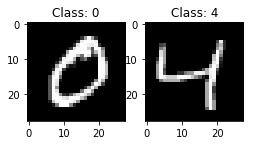

In [2]:
# ---- Loading images ----
def show_images(image_array, class_array):
    """
    Renders a given set of images and their classes
    """  
    def image(image_in, class_in, fig_in):
        """
        Render a single image assuming the 'figure' has been intialized
        """
        # Plotting image
        plt.imshow(image_in.reshape(28,28), interpolation='nearest', cmap='gray')
        # Fixing axes
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_aspect('equal')
        # Set Title
        ax.set_title('Class: {a}'.format(a=class_in))
    
    # -- Error handling --
    i_image, j_image = image_array.shape
    i_class = len(class_array)
    if (i_image != i_class):
        raise ValueError('Number of inputs does not equal number of ouputs')

    # Setup figure
    fig = plt.figure()
     
    for i in range(i_image):
        ax = fig.add_subplot(1,i_image+1,i+1)
        image(image_array[i],class_array[i],fig)
    plt.show()
# Plotting images
show_images(train_set[0][1:3],train_set[1][1:3])

- The method above provides loads data from pickeled files
- MNIST was loaded from disk, we can read in other data formats

### Loading Images from Folders
- There are different ways to read in data in python
- If all the files are located in a single folder then they can be read in using a generator and stored in an array
- Below is a general approach for iterating through folders, it can be adapted for files stored in a single folder 
- We use the [Labeled Faces in the Wild Home](http://vis-www.cs.umass.edu/lfw/)
    - Contains 13233, 250$\times$250 color images of 5760 famous people
    - We'll compare two different methods for reading in files matplotlib and openCV
    - OpenCV is commercial grade software and reads the images about 20% faster than matplotlib

In [ ]:
imgs = []
base_path = os.getcwd()
base_folder_path = os.path.join(base_path,'lfw')
image_folders = map(lambda x: os.path.join(base_folder_path, x), os.listdir(base_folder_path)[1:])

In [ ]:
os.path.join(image_folders[5], "Aaron_Sorkin_0001.jpg")

There are 5749 folders containg 
      images of people in the base folders


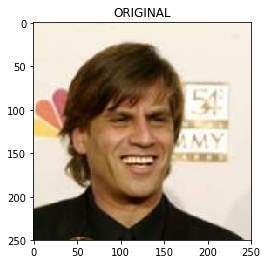

/Users/keegan/Desktop/georgetown/DeepLearning/deepLearningGU/lectures/notebooks/week2/lfw/Ahmad_Jbarah/Ahmad_Jbarah_0001.jpg


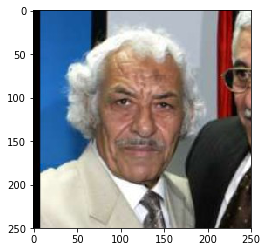

There are 13233 unique images in this data set

OpenCV: Total elapse time: 1.3995 seconds for 1000 loads
Matplotlib: Total elapse time: 3.5984 seconds for 1000 loads
OpenCV is approximately 157.1% faster than MatplotLib


In [4]:
# --- Setting base dir ---
# Assuming your image folders is located in the base directory
imgs = []
base_path = os.getcwd()
base_folder_path = os.path.join(base_path,'lfw')
image_folders = map(lambda x: os.path.join(base_folder_path, x), os.listdir(base_folder_path)[1:])
print('''There are {} folders containg 
      images of people in the base folders'''.format(len(image_folders)))

# --- Visualizing one picture ----
check = image_folders[5]
image_file_to_be_read = os.path.join(check, os.listdir(check)[0])
img=mpimg.imread(image_file_to_be_read)
plt.imshow(img),plt.title('ORIGINAL')
plt.show()

# ---- Function for plotting multiple images ----
def plot_images(location_of_images):
    l = len(os.listdir(location_of_images))
    for i, image_i in enumerate(os.listdir(location_of_images)):
        plt.subplot(l, 1, i+1)
        image_file_to_be_read = os.path.join(location_of_images, image_i)
        print(image_file_to_be_read)
        img=mpimg.imread(image_file_to_be_read)
        plt.imshow(img)
    plt.show()
plot_images(image_folders[55])

# ---- Crawler for images ----
images = [os.path.join(folder,file_in_folder) 
          for folder in image_folders
          if os.path.isdir(folder) # check to ensure folder is a folder
          for file_in_folder in os.listdir(folder)
          ]
print('There are {} unique images in this data set'.format(len(images)))

# --- Compare load times for 1000 images ---
def opencv_load_image(images_to_be_loaded, n = 1000):
    start = timer()
    for i in range(n):
         cv2.imread(images_to_be_loaded[n], cv2.IMREAD_COLOR)
    end = timer()
    return round(end - start,4)

def matplotlib_load_image(images_to_be_loaded, n = 1000):
    start = timer()
    for i in range(n):
         mpimg.imread(images_to_be_loaded[n])
    end = timer()
    return round(end - start,4)

n=1000

opencv_time = opencv_load_image(images, n = n)
matplotlib_time = matplotlib_load_image(images, n = n)

print('''
OpenCV: Total elapse time: {et1} seconds for {l1} loads
Matplotlib: Total elapse time: {et2} seconds for {l2} loads
OpenCV is approximately {perc}% faster than MatplotLib'''
      .format(et1 = opencv_time, l1 = n,
              et2 = matplotlib_time, l2 = n,
              perc = round(matplotlib_time/opencv_time,3)*100-100))

- Next we load the full data set into python
- The array will be pre-allocated
- It's best practice to do this first with a small subset then scale up

In [10]:
# -- Load locations of 100 images --
images_subset = images[0:100]

# -- Preallocate 24 bit array --
data = np.empty((len(images_subset), 3, 250, 250), dtype=np.uint8)

# -- Iterate through locations and store in array --
for i, fpath in enumerate(images_subset):
  img = cv2.imread(fpath, cv2.IMREAD_COLOR)
  # transpose is necessary for correct colorization
  data[i, ...] = img.transpose(2, 0, 1)

### Memory footprint
- Below is a utility function to assess the size of your data set is
- It is helpful to understand the amount of data loaded into python
- In general values are stored in memory for fast access
    - For best performance you'll want to make sure the loaded data do not exceed total RAM
    - When the amount of data loaded in RAM exceeds available RAM it gets written to disk
    - Reading and writing from disk is much slower than in-memory and will slow processing

In [11]:
import math

def convert_size(object_in):
    size_bytes = os.sys.getsizeof(object_in)
    if (size_bytes == 0):
        return '0B'
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes/p, 2)
    return '%s %s' % (s, size_name[i])

print('For 100 images the total memory footprint is:' + str(convert_size(data)))

For 100 images the total memory footprint is:17.88 MB


# Loading data through Keras
- Keras is a high-level API
- It comes bundled with tensorflow
- Several common data sets can be loaded through it's API, these include:
    - __MNIST__: 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images
    - __Fashion MNIST__:  60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images
    - __IMDB__: 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative)
    - __CIFAR 10__: 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images
    - __CIFAR 100__: 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images
    - __Reuters newswire articles__: 11,228 newswires from Reuters, labeled over 46 topics
    - __Boston Housing Data__:  13 attributes of houses at different locations around the Boston suburbs in the late 1970s
- For a full description see the documentation [here](https://keras.io/datasets/)
- Notes: 
    - This api is bundled with tensorflow
    - All data is stored in `~/.keras/datasets/ + path`
    - Do not use this api until lecture 5 where we discuss deep learning tools
        - Installing tensorflow properly (with gpu support) isn't simple
        - Installing base tensorflow (with cpu support) has much worse performance


In [ ]:
# --- Loading data sets through keras ----
from keras.datasets import mnist, fashion_mnist, boston_housing
from keras.dataset import cifar10, cifar100
from keras.datasets import imdb, reuters

# MNIST, Fashion MNIST, Boston Housing Data sets
(x_train, y_train), (x_test, y_test) = mnist.pkl.gz.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.pkl.gz.load_data()
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data(label_mode='fine')
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Reuters data set
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
word_index = reuters.get_word_index(path="reuters_word_index.json")

# Imdb data set
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)




# Additional DL Datasets
## Specific datasets
1. [Webhose.io - News Free Datasets](https://webhose.io/datasets/)
2. [Yelp dataset](https://www.yelp.com/dataset)
3. [Uber TLC FOIL Response](https://github.com/fivethirtyeight/uber-tlc-foil-response)
4. [Google Open Images Dataset](https://ai.googleblog.com/2016/09/introducing-open-images-dataset.html)
5. [Maluuba NewsQA Dataset](https://datasets.maluuba.com/NewsQA)
6. [Datascience Bowl 2017- Kaggle](https://www.kaggle.com/c/data-science-bowl-2017)

## Directories
1. [MILA Lab datasets](http://deeplearning.net/datasets/)
2. [Skymind Open Datasets](https://skymind.ai/wiki/open-datasets)
3. [Awesome Deep Learning (scroll down to dataset section)](https://github.com/ChristosChristofidis/awesome-deep-learning)
4. [Kaggle Image datasets](https://www.kaggle.com/datasets?sortBy=relevance&group=featured&search=image)
